In [7]:
from IPython.display import Image

# 2D Turbulent Hot Free Jet

## Literature

[**"Physical and computational aspects of convective heat transfer"**](http://link.springer.com/book/10.1007%2F978-1-4612-3918-5)

T. CEBECI, P. BRADSHAW, Springer 1984

## Equations for the 2D hot free jet

Applying assumptions from [Prandtl's boundary layer](https://en.wikipedia.org/wiki/Boundary_layer) theorem, the [Navier-Stokes equations](https://en.wikipedia.org/wiki/Navier%E2%80%93Stokes_equations) can simplified for the 2D turbulent free jet. The follwoing set of equations depict the continuity, momentum and energy equations, respectively.

\begin{align}
\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} & = 0 \\
u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} & = \frac{1}{\rho}\frac{\partial \tau}{\partial y} \\
u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} & = - \frac{1}{\rho c_P}\frac{\partial \dot q}{\partial y}
\end{align}

With

\begin{equation}
\tau = \mu \frac{\partial u}{\partial y}, \qquad \tau = \mu \frac{\partial u}{\partial y} - \rho \overline{u'v'}
\end{equation}

for the laminar and turbulent case, and similarly we have

\begin{equation}
\dot q = -\lambda \frac{\partial T}{\partial y}, \qquad \dot q = -\lambda \frac{\partial T}{\partial y} + \rho c_P \overline{T'v'}
\end{equation}

for the laminar and turbulent cases of the energy equation. A proper turbulence model has to be selected for the *Reynolds' stresses* and *turbulent diffusion*. In this case the **Cebeci-Smith** model, derived from the Schlichting formula which is based on the mixing length is applied.

Analogy considerations to the molecular viscosity lead to

\begin{equation}
\mu_t = \frac{- \rho \overline{u'v'}} {\partial u/\partial y} \qquad \text{so that} \qquad \mu_{eff} = \mu + \mu_t
\end{equation}

and for the turbulent diffussivity

\begin{equation}
\kappa_t = \frac{-\rho c_P \overline{T'v'}} {\partial T/\partial y} \qquad \text{so that} \qquad \kappa_{eff} = \kappa + \kappa_t  \qquad \text{with}  \qquad \kappa = \frac{\lambda}{\rho c_P} \qquad \text{being the } \textit {thermal diffusivity}.
\end{equation}

With

\begin{equation}
\epsilon_m = \frac{\mu_t}{\rho} \quad \text{and} \quad \epsilon_h = \frac{\kappa_t}{\rho c_P},\quad \text {we define the } \textit{eddy kinematic viscosity} \text{ and } \textit{eddy diffusivity of heat} \text{, respectively}.
\end{equation}

By analogy with the molecular Prandtl number:

\begin{equation}
Pr \equiv \frac{\nu}{\lambda} \equiv \frac{\mu c_P}{\lambda}
\end{equation}

 a *turbulent Prandtl* number can be defined

\begin{equation}
Pr_t \equiv \frac{\epsilon_m}{\epsilon_h}  \equiv \frac{\epsilon_m^+}{\epsilon_h^+} \equiv \frac{\rho \overline{u'v'} / (\partial u/\partial y)}{\overline{T'v'} / (\partial T/\partial y)}
\end{equation}

with

\begin{equation}
\epsilon_m^+ \equiv \frac{\epsilon_m}{\nu} \quad \text{and} \quad \epsilon_h^+ \equiv \frac{\epsilon_h}{\nu}.
\end{equation}

 Applying the **Falkner-Skan** transformation:

\begin{equation}
\eta \equiv \frac{y}{\delta} = \sqrt{\frac{u_0}{\nu L}}\frac{y}{3\xi^{2/3}}, \qquad \xi=\frac{x}{L}, \qquad \psi = \sqrt{u_0 \nu L}\xi^{1/3}f(\xi, \eta), \quad u = \frac{\partial \psi}{\partial y} = \frac{\partial \psi}{\partial \eta}\frac{\partial \eta}{\partial y}, \quad v = -\frac{\partial \psi}{\partial x} = -\frac{\partial \psi}{\partial \eta}\frac{\partial \eta}{\partial x}
\end{equation}

\begin{equation}
u = \frac{1}{3} \frac{u_0 f'}{\xi^{1/3}} \quad \text{with} \quad f' \equiv \frac{\partial f}{\partial \eta}
\end{equation}

the following equations for the 2D laminar heated free jet can be derived:

\begin{align}
f'''+(f')^2 +ff'' &= 3 \xi \left( f' \frac{\partial f'}{\partial \xi} - f'' \frac{\partial f}{\partial \xi}\right) \\
\frac{1}{Pr}g'' + (fg)' &= 3 \xi \left( f' \frac{\partial g}{\partial \xi} - g' \frac{\partial f}{\partial \xi}\right)
\end{align}

The boundary conditions are:

\begin{align}
\eta = 0&: \quad f = f'' = 0, \quad g' = 0 \\
\eta = \eta_e&: \quad f' = 0, \quad g = 0
\end{align}

## Keller's BOX method

The BOX-method of H.B. Keller is a second order accurate discretization scheme for parabolic partial differential equations. Since the boundary layer equations are of parabolic type the scheme is well suited.

The BOX-method consists of four steps:
1. Reduction of the order of the PDE by substitution to get a first order equation system
2. Use central differences for the discretization of the first order equations
3. Linearize the resulting algebraic equations (in case they are non-linear)
4. Solve the linear system

The order recuction is done by substitution which typically leads to a set of ODEs and one PDE. The ODEs are discretized at the new, unknown position (e.g. space or time), whereas the first oder PDE is discretized halfway between known and unknown quantities.

In this case, steps 3 and 4 are treated in a different way and a solver for a system of nonlinear equations is employed instead.

1. Reduction of the order of the PDE by substitution to get a first order equation system
2. Use central differences for the discretization of the first order equations
3. Rewrite linear and nonlinear discretized equations in the form F(x) = 0 and solve the system using SCIPY.

The solver applied is the **fsolve** solver from **scipy.optimize** and is dedicated to large systems of equations forming sparse matrices. 

### Step 1 - Order Reduction
Applying the order reduction of the BOX-method to the equations for the free jet and also introducing turbulence yields the following set of equations:

\begin{align}
f' &= u(\xi, \eta) \\
u' &= v(\xi, \eta) \\
g' &= p(\xi, \eta) \\
(bv)'+u^2 +fv &= 3 \xi \left( u \frac{\partial u}{\partial \xi} - v \frac{\partial f}{\partial \xi}\right) \\
(ep)' + fp &= 3 \xi \left( u \frac{\partial g}{\partial \xi} - p \frac{\partial f}{\partial \xi}\right)
\end{align}

which is a set of 3 ODEs and 2 PDEs, where

\begin{equation}
b = 1 + \epsilon_m^+  \quad \text{and} \quad e = \frac{1}{Pr} + \frac{\epsilon_m^+}{Pr_t}
\end{equation}

The boundary conditions after the substitution are:

\begin{align}
\eta = 0&: \quad f = v = 0, \quad p = 0 \\
\eta = \eta_e&: \quad u = 0, \quad g = 0
\end{align}

### Step 2 - Discretization

The figures below depict the transformed computational mesh at the nozzle exit and the nomenclature of the *Keller BOX* and associated discretization points for the ODEs and PDEs. In the lower sketch the solution propagation of the PDE is from left to right which corresponds to the flow direction and the parabolic nature of the flow type (downstream disturbances do not affect the upstream solution).

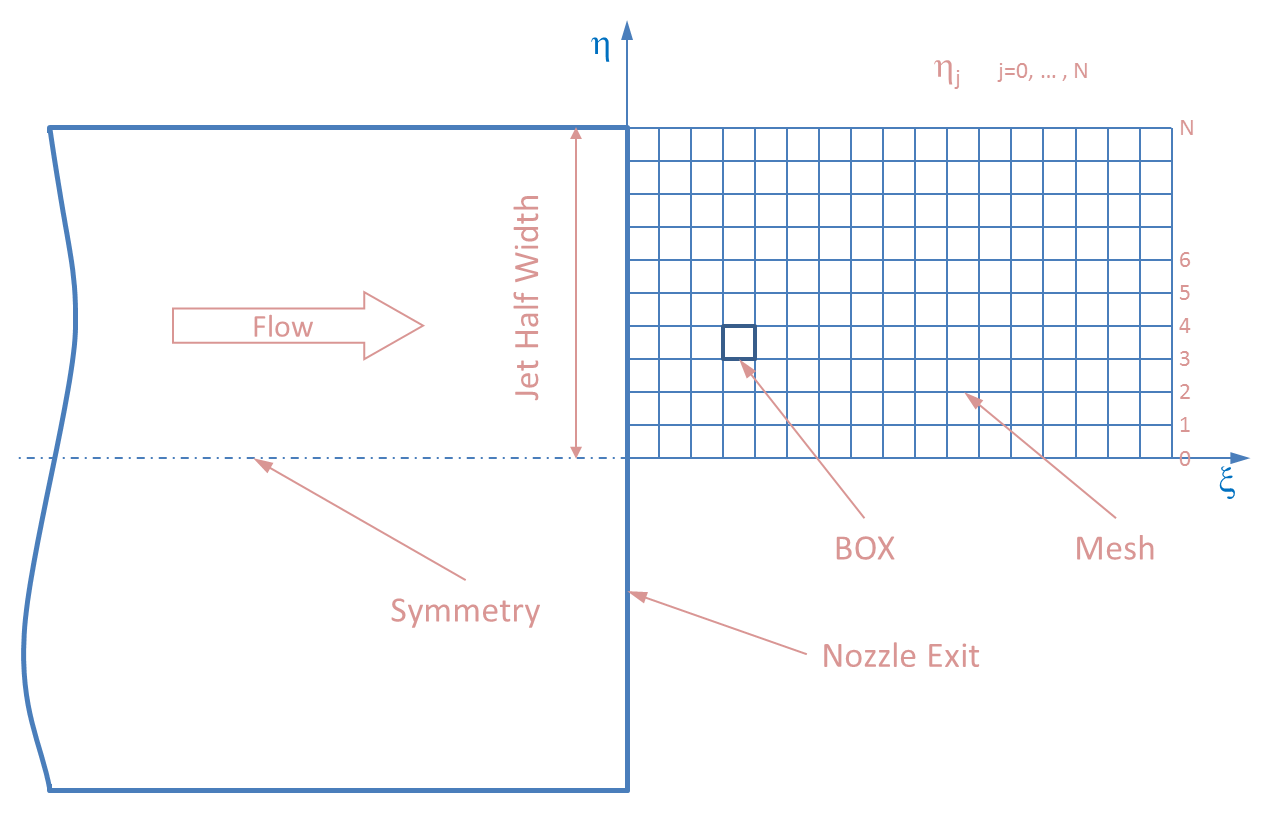

In [8]:
import os
path = 'C:\Dropbox\JET\Documentation'
_file = 'Nozzle_Meshgrid.png'
filename = os.path.join(path, _file)
Image(filename=filename, width=600)

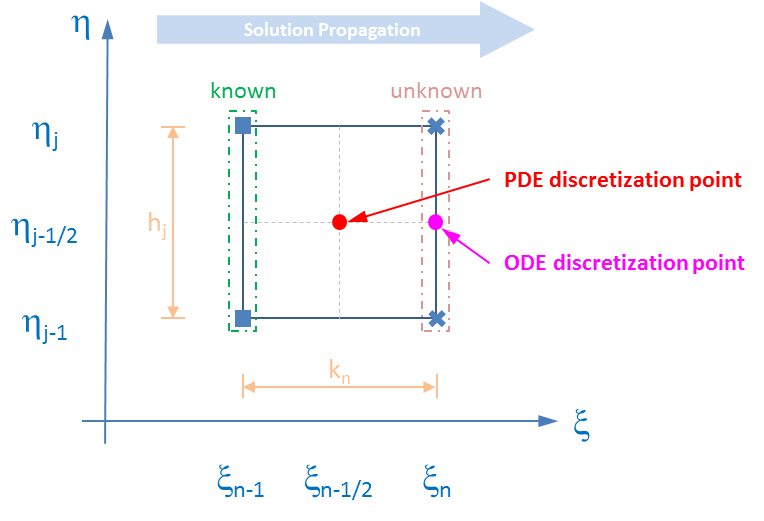

In [9]:
_file = 'Keller_BOX.png'
filename = os.path.join(path, _file)
Image(filename=filename, width=600)

#### ODE Discretization

\begin{equation}
f' = \frac{df}{d\eta} = u
\end{equation}

Using central differences to dicretize this ODE at the unknown location (see *ODE discretization point* in above figure) results in:

\begin{equation}
\frac{1}{h_j}(f_{j}^{n}-f_{j-1}^{n}) = \frac{1}{2}(u_{j}^{n}+u_{j-1}^{n})
\end{equation}

and likewise for the remaining two ODEs:

\begin{equation}
\frac{1}{h_j}(u_{j}^{n}-u_{j-1}^{n}) = \frac{1}{2}(v_{j}^{n}+v_{j-1}^{n})
\end{equation}

\begin{equation}
\frac{1}{h_j}(g_{j}^{n}-g_{j-1}^{n}) = \frac{1}{2}(p_{j}^{n}+p_{j-1}^{n})
\end{equation}

####PDE Discretization

#####Discretization of the Momentum Equation

\begin{equation}
(bv)'+u^2 +fv = 3 \xi \left( u \frac{\partial u}{\partial \xi} - v \frac{\partial f}{\partial \xi}\right)
\end{equation}

The PDE is again discretized using central differences, but now at a point halfway between known and unknown quantities in the center of the "Keller BOX" (see *PDE disecretization point* in above figure).

The discretization is done one by one for each individual term. For the first term of the momentum equation it is done in a quite verbose way in order to show the process in every detail. In the last line the variables are already separated in terms of known (superscript $n-1$) and unknown (superscript $n$) positions. This is needed later for grouping the coefficients of the unknowns as well as the known terms for the matrix-vector solution procedure ($\matrix{A}\vec{x}=\vec{b}$) for the linear equation system.

\begin{align}
(bv)' = \frac{\partial (bv)}{\partial \eta} &\approx \frac{1}{h_j}\left [\left(bv\right)_{j}^{n-1/2}-\left(bv\right)_{j-1}^{n-1/2}\right ] =\\
&= \frac{1}{h_j}\left [ \frac{1}{2}\left((bv)_{j}^{n} + (bv)_{j}^{n-1}\right) - \frac{1}{2}\left((bv)_{j-1}^{n} + (bv)_{j-1}^{n-1}\right)\right] = \\
&= \frac{1}{h_j}\left [ \frac{1}{2}(b_{j}^{n}v_{j}^{n} + b_{j}^{n-1}v_{j}^{n-1}) - \frac{1}{2}(b_{j-1}^{n}v_{j-1}^{n} + b_{j-1}^{n-1}v_{j-1}^{n-1})\right] = \\
&= \frac{1}{2 h_j} \left(b_{j}^{n}v_{j}^{n} - b_{j-1}^{n}v_{j-1}^{n}\right) + \frac{1}{2 h_j}\left(b_{j}^{n-1}v_{j}^{n-1} - b_{j-1}^{n-1}v_{j-1}^{n-1}\right) \\
\quad \\
u^2 &\approx \left (u^2 \right )_{j-1/2}^{n-1/2} = \\
& = \frac{1}{2} \left[\left ( u^2 \right)_{j-1/2}^{n} + \left(u^2\right)_{j-1/2}^{n-1}\right] \\
& = \frac{1}{4}\left[\left ( u^2 \right)_{j}^{n} + \left ( u^2 \right)_{j-1}^{n}\right] + \frac{1}{4}\left[\left ( u^2 \right)_{j}^{n-1} + \left ( u^2 \right)_{j-1}^{n-1}\right]\\
\quad \\
fv &\approx \left (fv \right )_{j-1/2}^{n-1/2} = \\
& = \frac{1}{2} \left[ \left(fv\right)_{j-1/2}^{n} + \left(fv\right)_{j-1/2}^{n-1}\right] \\
& = \frac{1}{4}\left(f_{j}^{n}v_{j}^{n} + f_{j-1}^{n}v_{j-1}^{n}\right) + \frac{1}{4}\left ( f_{j}^{n-1}v_{j}^{n-1} + f_{j-1}^{n-1}v_{j-1}^{n-1}\right) \\
\quad \\
3\xi &= 3\xi^{n-1/2} = \frac{3}{2}\left(\xi^n+\xi^{n-1}\right)
\quad \\
u &\approx u_{j-1/2}^{n-1/2} = \\
& = \frac{1}{2} \left(u_{j-1/2}^{n} + u_{j-1/2}^{n-1}\right) \\
& = \frac{1}{4}\left(u_{j}^{n} + u_{j-1}^{n}\right) + \frac{1}{4}\left(u_{j}^{n-1} + u_{j-1}^{n-1}\right)\\
\quad \\
\frac{\partial u}{\partial \xi} &\approx \frac{1}{k_n}\left (u_{j-1/2}^{n}-u_{j-1/2}^{n-1}\right ) =\\
&= \frac{1}{2 k_n}\left (u_{j}^{n}+u_{j-1}^{n}\right) - \frac{1}{2 k_n}\left (u_{j}^{n-1}+u_{j-1}^{n-1}\right) = \\
\quad \\
v &\approx v_{j-1/2}^{n-1/2} = \\
& = \frac{1}{2} \left(v_{j-1/2}^{n} + v_{j-1/2}^{n-1}\right) \\
& = \frac{1}{4}\left(v_{j}^{n} + v_{j-1}^{n}\right) + \frac{1}{4}\left(v_{j}^{n-1} + v_{j-1}^{n-1}\right)\\
\quad \\
\frac{\partial f}{\partial \xi} &\approx \frac{1}{k_n}\left (f_{j-1/2}^{n}-f_{j-1/2}^{n-1}\right ) =\\
&= \frac{1}{2 k_n}\left (f_{j}^{n}+f_{j-1}^{n}\right) - \frac{1}{2 k_n}\left (f_{j}^{n-1}+f_{j-1}^{n-1}\right)
\end{align}

Keeping the $( )_{j-1/2}$ terms, the complete discretized reduced order momentum equation now is:

\begin{equation}
\frac{1}{2 h_j} \left(b_{j}^{n}v_{j}^{n} - b_{j-1}^{n}v_{j-1}^{n}\right) + \frac{1}{2 h_j}\left(b_{j}^{n-1}v_{j}^{n-1} - b_{j-1}^{n-1}v_{j-1}^{n-1}\right) + \frac{1}{2} \left[\left ( u^2 \right)_{j-1/2}^{n} + \left(u^2\right)_{j-1/2}^{n-1}\right] + \frac{1}{2} \left[\left ( fv \right)_{j-1/2}^{n} + \left(fv\right)_{j-1/2}^{n-1}\right] = \frac{3}{2 k_n}\left(\xi^n+\xi^{n-1}\right)\left \{ \frac{1}{2} \left(u_{j-1/2}^{n} + u_{j-1/2}^{n-1}\right)\left (u_{j-1/2}^{n}-u_{j-1/2}^{n-1}\right) + \frac{1}{2} \left(v_{j-1/2}^{n} + v_{j-1/2}^{n-1}\right) \left(f_{j-1/2}^{n}-f_{j-1/2}^{n-1}\right )   \right\}
\end{equation}

Multiply by 2 and regroup LHS by unknowns and knowns:

\begin{equation}
\frac{1}{h_j} \left(b_{j}^{n}v_{j}^{n} - b_{j-1}^{n}v_{j-1}^{n}\right) + \left ( u^2 \right)_{j-1/2}^{n} + \left ( fv \right)_{j-1/2}^{n} + \frac{1}{h_j}\left(b_{j}^{n-1}v_{j}^{n-1} - b_{j-1}^{n-1}v_{j-1}^{n-1}\right)  + \left(u^2\right)_{j-1/2}^{n-1} + \left(fv\right)_{j-1/2}^{n-1} = \frac{3}{2 k_n}\left(\xi^n+\xi^{n-1}\right) \left\{ \left(u_{j-1/2}^{n} + u_{j-1/2}^{n-1}\right)\left (u_{j-1/2}^{n}-u_{j-1/2}^{n-1}\right) - \left(v_{j-1/2}^{n} + v_{j-1/2}^{n-1}\right) \left(f_{j-1/2}^{n}-f_{j-1/2}^{n-1}\right )   \right\}
\end{equation}

The prefactor on the RHS is substitued by $\alpha$:

\begin{equation}
\alpha = \frac{3}{2 k_n}\left(\xi^n+\xi^{n-1}\right) = 3 \frac{\xi^{n-1/2}}{\xi^n-\xi^{n-1}}
\end{equation}

\begin{equation}
\frac{1}{h_j} \left(b_{j}^{n}v_{j}^{n} - b_{j-1}^{n}v_{j-1}^{n}\right) + \left ( u^2 \right)_{j-1/2}^{n} + \left ( fv \right)_{j-1/2}^{n} + \frac{1}{h_j}\left(b_{j}^{n-1}v_{j}^{n-1} - b_{j-1}^{n-1}v_{j-1}^{n-1}\right)  + \left(u^2\right)_{j-1/2}^{n-1} + \left(fv\right)_{j-1/2}^{n-1} = \alpha \left\{ \left(u_{j-1/2}^{n} + u_{j-1/2}^{n-1}\right)\left (u_{j-1/2}^{n}-u_{j-1/2}^{n-1}\right) - \left(v_{j-1/2}^{n} + v_{j-1/2}^{n-1}\right) \left(f_{j-1/2}^{n}-f_{j-1/2}^{n-1}\right )   \right\}
\end{equation}

Resolving the terms on the RHS and indicating knowns and unknowns at the LHS:

\begin{equation}
\underbrace{ \frac{1}{h_j} \left(b_{j}^{n}v_{j}^{n} - b_{j-1}^{n}v_{j-1}^{n}\right) + \left ( u^2 \right)_{j-1/2}^{n} + \left ( fv \right)_{j-1/2}^{n} }_\text{unknown} + \underbrace{ \frac{1}{h_j}\left(b_{j}^{n-1}v_{j}^{n-1} - b_{j-1}^{n-1}v_{j-1}^{n-1}\right)  + \left(u^2\right)_{j-1/2}^{n-1} + \left(fv\right)_{j-1/2}^{n-1} }_\text{known} = \alpha \left\{ \left(u^2\right)_{j-1/2}^{n} - u_{j-1/2}^{n}u_{j-1/2}^{n-1}+ u_{j-1/2}^{n-1}u_{j-1/2}^{n}  - \left(u^2\right)_{j-1/2}^{n-1} - \left(fv\right)_{j-1/2}^{n} + v_{j-1/2}^{n}f_{j-1/2}^{n-1} - v_{j-1/2}^{n-1}f_{j-1/2}^{n} + \left(fv\right)_{j-1/2}^{n-1}   \right\}
\end{equation}

Futher rerarrangement and putting all unknowns to the LHS (also those, where knowns and unknowns are combined in a term) and all knowns to the RHS yields the final discretization of the reduced order momentum equation:

\begin{equation}
\frac{1}{h_j} \left(b_{j}^{n}v_{j}^{n} - b_{j-1}^{n}v_{j-1}^{n}\right) + \left(1-\alpha\right) \left( u^2 \right)_{j-1/2}^{n} + \left(1+\alpha\right) \left( fv \right)_{j-1/2}^{n} + \alpha \left( v_{j-1/2}^{n-1}f_{j-1/2}^{n}  - v_{j-1/2}^{n}f_{j-1/2}^{n-1} \right) = - \frac{1}{h_j}\left(b_{j}^{n-1}v_{j}^{n-1} - b_{j-1}^{n-1}v_{j-1}^{n-1}\right) - \left(1+\alpha\right) \left( u^2 \right)_{j-1/2}^{n-1} - \left(1-\alpha\right)\left(fv\right)_{j-1/2}^{n-1}  
\end{equation}

#####Discretization of the Energy Equation

\begin{equation}
(ep)' + fp = 3 \xi \left( u \frac{\partial g}{\partial \xi} - p \frac{\partial f}{\partial \xi}\right)
\end{equation}

The discretization is done again one by one for each individual term, but now without being too verbose.

\begin{align}
(ep)' = \frac{\partial (ep)}{\partial \eta} &\approx \frac{1}{h_j}\left [\left(ep\right)_{j}^{n-1/2}-\left(ep\right)_{j-1}^{n-1/2}\right ] =\\
&= \frac{1}{2 h_j} \left(e_{j}^{n}p_{j}^{n} - e_{j-1}^{n}p_{j-1}^{n}\right) + \frac{1}{2 h_j}\left(e_{j}^{n-1}p_{j}^{n-1} - e_{j-1}^{n-1}p_{j-1}^{n-1}\right) \\
\quad \\
fp &\approx \left (fp \right )_{j-1/2}^{n-1/2} = \\
& = \frac{1}{2} \left[ \left(fp\right)_{j-1/2}^{n} + \left(fp\right)_{j-1/2}^{n-1}\right] \\
\quad \\
3\xi &= 3\xi^{n-1/2} = \frac{3}{2}\left(\xi^n+\xi^{n-1}\right)
\quad \\
u &\approx u_{j-1/2}^{n-1/2} = \\
& = \frac{1}{2} \left(u_{j-1/2}^{n} + u_{j-1/2}^{n-1}\right) \\
\quad \\
\frac{\partial g}{\partial \xi} &\approx \frac{1}{k_n}\left (g_{j-1/2}^{n}-g_{j-1/2}^{n-1}\right )\\
\quad \\
p &\approx p_{j-1/2}^{n-1/2} = \\
& = \frac{1}{2} \left(p_{j-1/2}^{n} + p_{j-1/2}^{n-1}\right) \\
\quad \\
\frac{\partial f}{\partial \xi} &\approx \frac{1}{k_n}\left (f_{j-1/2}^{n}-f_{j-1/2}^{n-1}\right )
\end{align}

Discretized energy equation:

\begin{equation}
\frac{1}{2 h_j} \left(e_{j}^{n}p_{j}^{n} - e_{j-1}^{n}p_{j-1}^{n}\right) + \frac{1}{2 h_j}\left(e_{j}^{n-1}p_{j}^{n-1} - e_{j-1}^{n-1}p_{j-1}^{n-1}\right) + \frac{1}{2} \left[ \left(fp\right)_{j-1/2}^{n} + \left(fp\right)_{j-1/2}^{n-1}\right] = \frac{3}{2 k_n}\left(\xi^n+\xi^{n-1}\right) \left[\frac{1}{2} \left(u_{j-1/2}^{n} + u_{j-1/2}^{n-1}\right) \left (g_{j-1/2}^{n}-g_{j-1/2}^{n-1}\right ) - \frac{1}{2} \left(p_{j-1/2}^{n} + p_{j-1/2}^{n-1}\right)\left (f_{j-1/2}^{n}-f_{j-1/2}^{n-1}\right ) \right]
\end{equation}

Final discretization of the reduced order energy equation with separated knowns and unknowns.

\begin{equation}
\frac{1}{h_j} \left(e_{j}^{n}p_{j}^{n} - e_{j-1}^{n}p_{j-1}^{n}\right) + \left(1+\alpha\right) \left( fp \right)_{j-1/2}^{n} - \alpha \left[\left( ug \right)_{j-1/2}^{n} + u_{j-1/2}^{n-1}g_{j-1/2}^{n} - u_{j-1/2}^{n}g_{j-1/2}^{n-1} + p_{j-1/2}^{n}f_{j-1/2}^{n-1} - p_{j-1/2}^{n-1}f_{j-1/2}^{n}  \right] = - \frac{1}{h_j}\left(e_{j}^{n-1}p_{j}^{n-1} - e_{j-1}^{n-1}p_{j-1}^{n-1}\right) - \left(1-\alpha\right)\left(fp\right)_{j-1/2}^{n-1} - \alpha \left( ug \right)_{j-1/2}^{n-1}
\end{equation}

**All discretized ODEs and PDEs together:**

\begin{equation}
\frac{1}{h_j}(f_{j}^{n}-f_{j-1}^{n}) = \frac{1}{2}(u_{j}^{n}+u_{j-1}^{n}) \\
\quad \\
\frac{1}{h_j}(u_{j}^{n}-u_{j-1}^{n}) = \frac{1}{2}(v_{j}^{n}+v_{j-1}^{n}) \\
\quad \\
\frac{1}{h_j}(g_{j}^{n}-g_{j-1}^{n}) = \frac{1}{2}(p_{j}^{n}+p_{j-1}^{n}) \\
\quad \\
\frac{1}{h_j} \left(b_{j}^{n}v_{j}^{n} - b_{j-1}^{n}v_{j-1}^{n}\right) + \left(1-\alpha\right) \left( u^2 \right)_{j-1/2}^{n} + \left(1+\alpha\right) \left( fv \right)_{j-1/2}^{n} + \alpha \left( v_{j-1/2}^{n-1}f_{j-1/2}^{n}  - v_{j-1/2}^{n}f_{j-1/2}^{n-1} \right) = - \frac{1}{h_j}\left(b_{j}^{n-1}v_{j}^{n-1} - b_{j-1}^{n-1}v_{j-1}^{n-1}\right) - \left(1+\alpha\right) \left( u^2 \right)_{j-1/2}^{n-1} - \left(1-\alpha\right)\left(fv\right)_{j-1/2}^{n-1}  \\
\quad \\
\frac{1}{h_j} \left(e_{j}^{n}p_{j}^{n} - e_{j-1}^{n}p_{j-1}^{n}\right) + \left(1+\alpha\right) \left( fp \right)_{j-1/2}^{n} - \alpha \left[\left( ug \right)_{j-1/2}^{n} + u_{j-1/2}^{n-1}g_{j-1/2}^{n} - u_{j-1/2}^{n}g_{j-1/2}^{n-1} + p_{j-1/2}^{n}f_{j-1/2}^{n-1} - p_{j-1/2}^{n-1}f_{j-1/2}^{n}  \right] = - \frac{1}{h_j}\left(e_{j}^{n-1}p_{j}^{n-1} - e_{j-1}^{n-1}p_{j-1}^{n-1}\right) - \left(1-\alpha\right)\left(fp\right)_{j-1/2}^{n-1} - \alpha \left( ug \right)_{j-1/2}^{n-1}
\end{equation}

And the boundary conditions become:

\begin{equation}
f_0 = 0, \quad v_0 = 0, \quad p_0 = 0 \\
u_J = 0, \quad g_J = 0
\end{equation}

### Step 3 - Rewrite Equations for SciPy Solver

If we simply rearrange the equations in the form $f(x)=0$, where $f$ is a vector valued function consisting of:

\begin{equation}
f_1(x_1, x_2, x_3, . . . , x_n) = 0 \\
f_2(x_1, x_2, x_3, . . . , x_n) = 0 \\
. \\
. \\
f_n(x_1, x_2, x_3, . . . , x_n) = 0
\end{equation}

and $(x_1, x_2, x_3, . . . , x_n)$ being the solution vector $x$ we can apply the solver [*scipy.optimize.fsolve*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html#scipy.optimize.fsolve) from the [scipy](http://www.scipy.org/) package.

\begin{equation}
\frac{1}{h_j}(f_{j}^{n}-f_{j-1}^{n}) - \frac{1}{2}(u_{j}^{n}+u_{j-1}^{n}) = 0\\
\quad \\
\frac{1}{h_j}(u_{j}^{n}-u_{j-1}^{n}) - \frac{1}{2}(v_{j}^{n}+v_{j-1}^{n}) = 0\\
\quad \\
\frac{1}{h_j}(g_{j}^{n}-g_{j-1}^{n}) - \frac{1}{2}(p_{j}^{n}+p_{j-1}^{n}) = 0\\
\quad \\
\frac{1}{h_j} \left(b_{j}^{n}v_{j}^{n} - b_{j-1}^{n}v_{j-1}^{n}\right) + \left(1-\alpha\right) \left( u^2 \right)_{j-1/2}^{n} + \left(1+\alpha\right) \left( fv \right)_{j-1/2}^{n} + \alpha \left( v_{j-1/2}^{n-1}f_{j-1/2}^{n}  - v_{j-1/2}^{n}f_{j-1/2}^{n-1} \right) + \frac{1}{h_j}\left(b_{j}^{n-1}v_{j}^{n-1} - b_{j-1}^{n-1}v_{j-1}^{n-1}\right) + \left(1+\alpha\right) \left( u^2 \right)_{j-1/2}^{n-1} + \left(1-\alpha\right)\left(fv\right)_{j-1/2}^{n-1}  = 0 \\
\quad \\
\frac{1}{h_j} \left(e_{j}^{n}p_{j}^{n} - e_{j-1}^{n}p_{j-1}^{n}\right) + \left(1+\alpha\right) \left( fp \right)_{j-1/2}^{n} - \alpha \left[\left( ug \right)_{j-1/2}^{n} + u_{j-1/2}^{n-1}g_{j-1/2}^{n} - u_{j-1/2}^{n}g_{j-1/2}^{n-1} + p_{j-1/2}^{n}f_{j-1/2}^{n-1} - p_{j-1/2}^{n-1}f_{j-1/2}^{n}  \right] + \frac{1}{h_j}\left(e_{j}^{n-1}p_{j}^{n-1} - e_{j-1}^{n-1}p_{j-1}^{n-1}\right) + \left(1-\alpha\right)\left(fp\right)_{j-1/2}^{n-1} + \alpha \left( ug \right)_{j-1/2}^{n-1} = 0
\end{equation}